reference: https://zhuanlan.zhihu.com/p/101799677

In [1]:
import torch
torch.__version__

'1.6.0'

In [2]:
from __future__ import print_function
import torch

In [3]:
x = torch.empty(5, 3)
print(x)

tensor([[-3.9830e+18,  5.4651e-43, -3.9830e+18],
        [ 5.4651e-43, -3.9828e+18,  5.4651e-43],
        [-3.9828e+18,  5.4651e-43, -3.9826e+18],
        [ 5.4651e-43, -3.9826e+18,  5.4651e-43],
        [-3.9826e+18,  5.4651e-43, -3.9826e+18]])


In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6604, 0.7379, 0.1192],
        [0.8583, 0.0164, 0.2356],
        [0.7433, 0.1963, 0.9755],
        [0.8687, 0.3586, 0.6321],
        [0.1501, 0.7177, 0.6657]])


In [5]:
x = torch.zeros(5, 3)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [6]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [7]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [8]:
import torch
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [9]:
x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[-0.4872, -0.0134,  0.8560],
        [-0.4319,  1.9692,  0.6007],
        [-1.3057,  0.1212,  1.5204],
        [ 1.1853, -0.8292,  0.1865],
        [ 0.8168, -0.5766,  1.1799]])


In [10]:
# 獲取size
print(x.size())
torch.Size([5,3])

torch.Size([5, 3])


torch.Size([5, 3])

In [11]:
y = torch.rand(5,3)
print(x+y)

tensor([[ 0.4979,  0.6362,  0.9685],
        [-0.1553,  2.4654,  1.2631],
        [-0.6036,  0.9839,  2.3661],
        [ 1.4032, -0.3995,  0.7656],
        [ 1.5628,  0.3429,  1.1966]])


In [12]:
# 加法2
print(torch.add(x,y))

tensor([[ 0.4979,  0.6362,  0.9685],
        [-0.1553,  2.4654,  1.2631],
        [-0.6036,  0.9839,  2.3661],
        [ 1.4032, -0.3995,  0.7656],
        [ 1.5628,  0.3429,  1.1966]])


In [13]:
result = torch.empty(5,3)
torch.add(x, y, out = result)
print(result)

tensor([[ 0.4979,  0.6362,  0.9685],
        [-0.1553,  2.4654,  1.2631],
        [-0.6036,  0.9839,  2.3661],
        [ 1.4032, -0.3995,  0.7656],
        [ 1.5628,  0.3429,  1.1966]])


In [14]:
# 替換, adds x to y
y.add_(x)
print(y)

tensor([[ 0.4979,  0.6362,  0.9685],
        [-0.1553,  2.4654,  1.2631],
        [-0.6036,  0.9839,  2.3661],
        [ 1.4032, -0.3995,  0.7656],
        [ 1.5628,  0.3429,  1.1966]])


In [15]:
print(x[:, 1])

tensor([-0.0134,  1.9692,  0.1212, -0.8292, -0.5766])


In [16]:
# torch.view与Numpy的reshape类似
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8) # size -1 從其他維度推斷
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [17]:
# 如果你有只有一个元素的张量，使用.item()来得到Python数据类型的数值
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.9878])
0.9878203272819519


将Torch Tensor转换成NumPy array，反之亦然，这是轻而易举的。 Torch Tensor和NumPy array将共享它们的底层内存位置，更改其中一个将更改另一个。 将Torch Tensor转换为NumPy array。

In [18]:
import torch
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [19]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [20]:
# see how the numpy array changed in value
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


### NumPy Array 转化成 Torch Tensor

In [21]:
# 使用from_numpy自動轉化
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


所有的 Tensor 类型默认都是基于CPU， CharTensor 类型不支持到 NumPy 的转换.

In [22]:
# CUDA 张量. 使用.to 方法 可以将Tensor移动到任何设备中

# is_available 函數判斷是否有cuda可以使用
# ``torch.device`` 將張量移動到指定的設備中
if torch.cuda.is_available():
    device = torch.device("cuda") # a CUDA 設備對象
    y = torch.ones_like(x, device=device) # 直接從GPU創建張量 
    x = x.to(device) #或者直接使用``.to("cuda")``將張量移動到CUDA中
    z = x + y
    print(z)
    print(z.to('cpu', torch.double))  # ``.TO``也會對變量的類型做更改

tensor([1.9878], device='cuda:0')
tensor([1.9878], dtype=torch.float64)


自动求导

In [23]:
%matplotlib inline

In [24]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [25]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [26]:
print(y.grad_fn)

In [27]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [28]:
a = torch.randn(2, 2)
a = ((a*3)/(a-1))
print(a.requires_grad)
print(a.grad_fn)

a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
None
True


In [29]:
out.backward()

In [30]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [31]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

tensor([ -136.4454, -1110.6400,   915.3831], grad_fn=<MulBackward0>)


In [32]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)
print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [33]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


神经网络

In [34]:
%matplotlib inline

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

用cifar10训练一个分类器

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, transform= transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                          download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


 deer plane   cat   cat


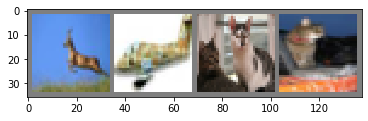

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 展示圖像的函數
def imshow(img):
    img = img/2 + 0.5  #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
# 獲取隨機數據
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 展示圖象
imshow(torchvision.utils.make_grid(images))

# 顯示圖像標簽
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
# Predicted:  plane plane plane plane

refernce: https://www.jiqizhixin.com/articles/2018-04-11-3

PyTorch 是一个建立在 Torch 库之上的 Python 包，旨在加速深度学习应用。

PyTorch 提供一种类似 NumPy 的抽象方法来表征张量（或多维数组），它可以利用 GPU 来加速训练。

**1.1 PyTorch 张量**

PyTorch 的关键数据结构是张量，即多维数组。其功能与 NumPy 的 ndarray 对象类似，如下我们可以使用 torch.Tensor() 创建张量

In [3]:
# Generate a 2-D pytorch tensor (i.e., a matrix)
import torch
pytorch_tensor = torch.Tensor(10, 20)
print("type: ", type(pytorch_tensor), " and size: ", pytorch_tensor.shape )

type:  <class 'torch.Tensor'>  and size:  torch.Size([10, 20])


如果你需要一个兼容 NumPy 的表征，或者你想从现有的 NumPy 对象中创建一个 PyTorch 张量，那么就很简单了。

In [5]:
# Convert the pytorch tensor to a numpy array:
numpy_tensor = pytorch_tensor.numpy()
print("type:", type(numpy_tensor), " and size", numpy_tensor.shape)

type: <class 'numpy.ndarray'>  and size (10, 20)


In [7]:
# Convert the numpy array to a Pytorch Tensor:
print("type:", type(numpy_tensor), " and size", torch.Tensor(numpy_tensor).shape)

type: <class 'numpy.ndarray'>  and size torch.Size([10, 20])


1.2 PyTorch vs. NumPy

PyTorch 并不是 NumPy 的简单替代品，但它实现了很多 NumPy 功能。其中有一个不便之处是其命名规则，有时候它和 NumPy 的命名方法相当不同。我们来举几个例子说明其中的区别：

1. 張量創建

In [9]:

import numpy as np
t = torch.rand(2,4,3,5)
a = np.random.rand(2,4,3,5)

2. 張量分割

In [10]:
t = torch.rand(2,4,3,5)
a = t.numpy()
pytorch_slice = t[0, 1:3, :, 4]
numpy_slice = a[0, 1:3, :, 4]
print('Tensor[0, 1:3, :, 4]:\n', pytorch_slice)
print('NdArray[0, 1:3, :, 4]:\n]', numpy_slice)

Tensor[0, 1:3, :, 4]:
 tensor([[0.4960, 0.9719, 0.2435],
        [0.4931, 0.3807, 0.1943]])
NdArray[0, 1:3, :, 4]:
] [[0.4959833  0.971874   0.2434935 ]
 [0.49314225 0.38066447 0.19427013]]


3. 張量 Masking

In [20]:
t = t - 0.5
a = t.numpy()
pytorch_masked = t[t > 0]
numpy_masked = a[a > 0]

In [21]:
pytorch_masked

tensor([])

In [22]:
numpy_masked

array([], dtype=float32)

4. 張量重塑

In [14]:
pytorch_reshape = t.view([6, 5, 4])
numpy_reshape = a.reshape([6, 5, 4])

In [15]:
pytorch_reshape 

tensor([[[ 1.3499e-01,  4.3874e-02, -3.2541e-01, -4.8674e-01],
         [ 1.3957e-01, -1.8254e-01, -8.0059e-02,  3.9846e-01],
         [-1.9758e-01, -3.0766e-02,  2.4679e-01,  4.5374e-01],
         [-2.4648e-01,  3.7080e-01, -3.5233e-01, -1.8802e-01],
         [-3.1814e-01,  2.6961e-01,  5.2826e-02, -4.0167e-03]],

        [[-4.3739e-02,  1.6435e-01,  6.2586e-02,  2.6949e-01],
         [ 4.7187e-01, -2.0288e-02, -8.4710e-02, -4.6763e-01],
         [-3.3020e-01, -2.5651e-01,  4.6512e-01, -1.3980e-01],
         [-4.8669e-01,  2.1759e-01, -6.8578e-03, -3.2854e-01],
         [-4.1243e-01, -3.1477e-01,  3.6455e-01, -1.1934e-01]],

        [[ 4.6741e-01,  5.0917e-02, -3.5496e-01,  2.0762e-01],
         [-3.0573e-01,  2.1459e-01,  1.6520e-01, -8.9986e-02],
         [-3.1704e-01,  4.2026e-01, -4.9812e-02, -3.5537e-01],
         [-2.8585e-02,  3.5656e-01,  3.9501e-01,  4.4415e-01],
         [-4.4905e-01,  4.5867e-01,  1.7886e-01,  3.4721e-01]],

        [[ 3.5079e-01,  1.7365e-01, -1.9594e-01, 

In [16]:
numpy_reshape 

array([[[ 1.3498873e-01,  4.3873966e-02, -3.2541257e-01, -4.8674423e-01],
        [ 1.3957298e-01, -1.8253958e-01, -8.0059171e-02,  3.9845812e-01],
        [-1.9758362e-01, -3.0766368e-02,  2.4678808e-01,  4.5373970e-01],
        [-2.4648064e-01,  3.7079901e-01, -3.5232890e-01, -1.8801910e-01],
        [-3.1814086e-01,  2.6960909e-01,  5.2825689e-02, -4.0166974e-03]],

       [[-4.3738902e-02,  1.6435188e-01,  6.2585831e-02,  2.6948851e-01],
        [ 4.7187400e-01, -2.0287752e-02, -8.4710360e-02, -4.6763009e-01],
        [-3.3019799e-01, -2.5650650e-01,  4.6511549e-01, -1.3979840e-01],
        [-4.8669022e-01,  2.1759480e-01, -6.8577528e-03, -3.2854253e-01],
        [-4.1243243e-01, -3.1476820e-01,  3.6454761e-01, -1.1933553e-01]],

       [[ 4.6740568e-01,  5.0916553e-02, -3.5495883e-01,  2.0762414e-01],
        [-3.0572987e-01,  2.1458781e-01,  1.6519970e-01, -8.9986384e-02],
        [-3.1704164e-01,  4.2026389e-01, -4.9811542e-02, -3.5537052e-01],
        [-2.8584838e-02,  3.565567

1.3 Pytorch變量

PyTorch張量的簡單封裝<br>
幫組建立計算圖<br>
AUTOGRAD(自動微分庫)的必要部分<br>
將關於這些變量的梯度保存在.grad中

![](img/pytorch001.png)

计算图和变量：在 PyTorch 中，神经网络会使用相互连接的变量作为计算图来表示。PyTorch 允许通过代码构建计算图来构建网络模型；之后 PyTorch 会简化估计模型权重的流程，例如通过自动计算梯度的方式。

举例来说，假设我们想构建两层模型，那么首先要为输入和输出创建张量变量。我们可以将 PyTorch Tensor 包装进 Variable 对象中：

In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

x = Variable(torch.randn(4, 1), requires_grad=False)
y = Variable(torch.randn(3, 1), requires_grad=False)

我们把 requires_grad 设置为 True，表明我们想要自动计算梯度，这将用于反向传播中以优化权重。

现在我们来定义权重：

In [2]:
w1 = Variable(torch.randn(5, 4), requires_grad=True)
w2 = Variable(torch.randn(3, 5), requires_grad=True)

In [16]:
# 訓練模型
def model_forward(x):
    return F.sigmoid(w2@F.sigmoid(w1@x))

print(w1, '\n')
print(w1.data.shape,'\n')
print(w1.grad)  # Ubutuakktm non-existent

tensor([[ 1.5874,  0.4285,  1.3146, -1.5830],
        [ 1.6895,  0.6176,  0.7884,  2.4284],
        [ 1.0964,  1.3882,  0.6652,  0.5075],
        [-2.2959,  1.9077, -0.4946, -1.1653],
        [ 0.5242,  1.0479, -1.9800, -1.0730]], requires_grad=True) 

torch.Size([5, 4]) 

None


1.4 PyTorch 反向传播

这样我们有了输入和目标、模型权重，那么是时候训练模型了。我们需要三个组件：

损失函数：描述我们模型的预测距离目标还有多远；

In [17]:
import torch.nn as nn
criterion = nn.MSELoss()

优化算法：用于更新权重；

In [18]:
import torch.optim as optim
optimizer = optim.SGD([w1, w2], lr=0.001)

反向传播步骤：

In [19]:
for epoch in range(10):
    loss = criterion(model_forward(x), y)
    optimizer.zero_grad() # Zero-out previous gradients
    loss.backward() # Compute new gradients
    optimizer.step() # Apply these gradients

C:\Users\Norto\anaconda3\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1.5 PyTorch CUDA 接口

PyTorch 的优势之一是为张量和 autograd 库提供 CUDA 接口。使用 CUDA GPU，你不仅可以加速神经网络训练和推断，还可以加速任何映射至 PyTorch 张量的工作负载。

你可以调用 torch.cuda.is_available() 函数，检查 PyTorch 中是否有可用 CUDA。

In [25]:
cuda_gpu = torch.cuda.is_available()
if (cuda_gpu):
    print("Great, you have a GPU")
else:
    print("Life is shor -- consider a GPU!")

Great, you have a GPU


很好，现在你有 GPU 了。

.cuda()

之后，使用 cuda 加速代码就和调用一样简单。如果你在张量上调用 .cuda()，则它将执行从 CPU 到 CUDA GPU 的数据迁移。如果你在模型上调用 .cuda()，则它不仅将所有内部储存移到 GPU，还将整个计算图映射至 GPU。

要想将张量或模型复制回 CPU，比如想和 NumPy 交互，你可以调用 .cpu()。

In [27]:
if cuda_gpu:
    x = x.cuda()
    print(type(x.data))
    
x = x.cpu()
print(type(x.data))

#我们来定义两个函数（训练函数和测试函数）来使用我们的模型执行训练和推断任务。
#该代码同样来自 PyTorch 官方教程，我们摘选了所有训练／推断的必要步骤。

<class 'torch.Tensor'>
<class 'torch.Tensor'>


对于训练和测试网络，我们需要执行一系列动作，这些动作可直接映射至 PyTorch 代码：

1. 我们将模型转换到训练／推断模式；

2. 我们通过在数据集上成批获取图像，以迭代训练模型；

3. 对于每一个批量的图像，我们都要加载数据和标注，运行网络的前向步骤来获取模型输出；

4. 我们定义损失函数，计算每一个批量的模型输出和目标之间的损失；

5. 训练时，我们初始化梯度为零，使用上一步定义的优化器和反向传播，来计算所有与损失有关的层级梯度；

6. 训练时，我们执行权重更新步骤。

In [30]:
def train(model, epoch, criterion, optimizer, data_loader):
    model.train()
    for batch_idx, (data, target) in enumerate(data_loader):
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)

        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 400 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (batch_idx+1) * len(data), len(data_loader.dataset),
                100. * (batch_idx+1) / len(data_loader), loss.data[0]))


def test(model, epoch, criterion, data_loader):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in data_loader:
        if cuda_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        data, target = Variable(data), Variable(target)
        output = model(data)
        test_loss += criterion(output, target).data[0]
        pred = output.data.max(1)[1] # get the index of the max log-probability
        correct += pred.eq(target.data).cpu().sum()

    test_loss /= len(data_loader) # loss function already averages over batch size
    acc = correct / len(data_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(data_loader.dataset), 100. * acc))
    return (acc, test_loss)

2. 使用 PyTorch 进行数据分析

使用 torch.nn 库构建模型

使用 torch.autograd 库训练模型

将数据封装进 torch.utils.data.Dataset 库

使用 NumPy interface 连接你的模型、数据和你最喜欢的工具

在查看复杂模型之前，我们先来看个简单的：简单合成数据集上的线性回归，我们可以使用 sklearn 工具生成这样的合成数据集。

In [31]:
from sklearn.datasets import make_regression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sns.set()

x_train, y_train, W_target = make_regression(n_samples=100, n_features=1, noise=10, coef=True)